In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
vehicle = pd.read_csv("vehicle.txt")

# Split the data into features (X) and target variable (y)
X = vehicle.drop('Class', axis=1)
y = pd.Categorical(vehicle['Class'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8678686)

# Models

In [3]:
# Decision Tree
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
pred_DT = model_DT.predict(X_test)
result_ca_DT = accuracy_score(y_test, pred_DT)
print("Decision Tree Accuracy:", result_ca_DT)

# Naive Bayes
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
pred_NB = model_NB.predict(X_test)
result_ca_NB = accuracy_score(y_test, pred_NB)
print("Naive Bayes Accuracy:", result_ca_NB)

# K-Nearest Neighbors
model_KNN = KNeighborsClassifier(n_neighbors=2)
model_KNN.fit(X_train, y_train)
pred_KNN = model_KNN.predict(X_test)
result_ca_KNN = accuracy_score(y_test, pred_KNN)
print("K-Nearest Neighbors Accuracy:", result_ca_KNN)

Decision Tree Accuracy: 0.6647058823529411
Naive Bayes Accuracy: 0.43529411764705883
K-Nearest Neighbors Accuracy: 0.6647058823529411


### Ensemble Learning

Ensemble learning is a machine learning technique that combines multiple individual models (base learners) to create a more robust and accurate predictive model. The fundamental idea is that by aggregating the predictions or decisions of diverse models, the ensemble model often outperforms any single model in the ensemble.

#### Types of Ensemble Methods:

1. **Bagging (Bootstrap Aggregating)**
   - **Concept**: It involves training multiple instances of the same base learning algorithm on different subsets of the training data (sampled with replacement).
   - **Example**: Random Forest is an ensemble of decision trees created through bagging.

2. **Boosting**
   - **Concept**: It focuses on sequentially training models where each subsequent model corrects the errors of its predecessor.
   - **Example**: AdaBoost and Gradient Boosting are popular boosting algorithms.

3. **Stacking**
   - **Concept**: Involves combining predictions of multiple base learners using a meta-learner (another model).
   - **Implementation**: The predictions of individual models serve as input features for the meta-learner.

4. **Voting**
   - **Concept**: Combines predictions from multiple models (can be homogeneous or heterogeneous models).
   - **Types**: 
       - *Hard Voting*: Combines predictions by majority voting.
       - *Soft Voting*: Weights the predictions based on confidence scores or probabilities.

#### Benefits of Ensemble Learning:

- **Improved Accuracy**: Ensemble methods often provide better predictive performance compared to individual models, especially when the base models are diverse.
  
- **Reduced Overfitting**: By aggregating predictions from multiple models, ensemble methods can reduce overfitting and increase generalization.

- **Robustness**: Ensembles are more robust to outliers or noisy data as they consider multiple perspectives when making predictions.

#### Considerations:

- **Diversity**: The key to successful ensembles is diversity among base learners. Diverse models (different algorithms, subsets of data, or different features) tend to improve ensemble performance.

- **Computation**: Ensembles may require more computational resources and training time due to the need to train multiple models.

Ensemble learning is a powerful concept widely used in various machine learning applications, leveraging the collective intelligence of multiple models to achieve superior predictive accuracy and robustness.


In [4]:
# Hard Voting
model_voting = VotingClassifier(estimators=[('dt', model_DT), ('nb', model_NB), ('knn', model_KNN)], voting='hard')
model_voting.fit(X_train, y_train)
pred_voting = model_voting.predict(X_test)
result_voting = accuracy_score(y_test, pred_voting)
print("Voting Accuracy:", result_voting)

Voting Accuracy: 0.7


In [5]:
# Soft Voting
model_voting = VotingClassifier(estimators=[('dt', model_DT), ('nb', model_NB), ('knn', model_KNN)], voting='soft')
model_voting.fit(X_train, y_train)
pred_voting = model_voting.predict(X_test)
result_voting = accuracy_score(y_test, pred_voting)
print("Voting Accuracy:", result_voting)

Voting Accuracy: 0.6823529411764706


In [6]:
# Weighted Voting 
pred_DT_prob = model_DT.predict_proba(X_test)
pred_NB_prob = model_NB.predict_proba(X_test)
pred_KNN_prob = model_KNN.predict_proba(X_test)

weighted_DT_prob = result_ca_DT * pred_DT_prob
weighted_NB_prob = result_ca_NB * pred_NB_prob
weighted_KNN_prob = result_ca_KNN * pred_KNN_prob

pred_prob = weighted_DT_prob + weighted_NB_prob + weighted_KNN_prob
predicted_labels = np.argmax(pred_prob, axis=1)

# int2class conversion dict
class_conv = {
    0: 'bus',
    1: 'opel',
    2: 'saab',
    3: 'van'
}

# Evaluate
predicted_labels = [class_conv[i] for i in predicted_labels]
result_wvoting = accuracy_score(y_test, predicted_labels)
print("Weighted Voting Accuracy:", result_wvoting)

Weighted Voting Accuracy: 0.6882352941176471


In [7]:
# Bagging
model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=14, random_state=8678686)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
result_bagging = accuracy_score(y_test, pred_bagging)
print("Bagging Accuracy:", result_bagging)

Bagging Accuracy: 0.7058823529411765


/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [8]:
# Random Forest
model_rf = RandomForestClassifier(random_state=8678686)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
result_rf = accuracy_score(y_test, pred_rf)
print("Random Forest Accuracy:", result_rf)

Random Forest Accuracy: 0.7352941176470589


In [9]:
# Boosting
model_boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=8678686)
model_boosting.fit(X_train, y_train)
pred_boosting = model_boosting.predict(X_test)
result_boosting = accuracy_score(y_test, pred_boosting)
print("Boosting Accuracy:", result_boosting)

Boosting Accuracy: 0.6529411764705882


/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=8678686)

# XGBoost
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
result_xgb = accuracy_score(y_test, pred_xgb)
print("XGBoost Accuracy:", result_xgb)

/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return 

XGBoost Accuracy: 0.7470588235294118


/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return 

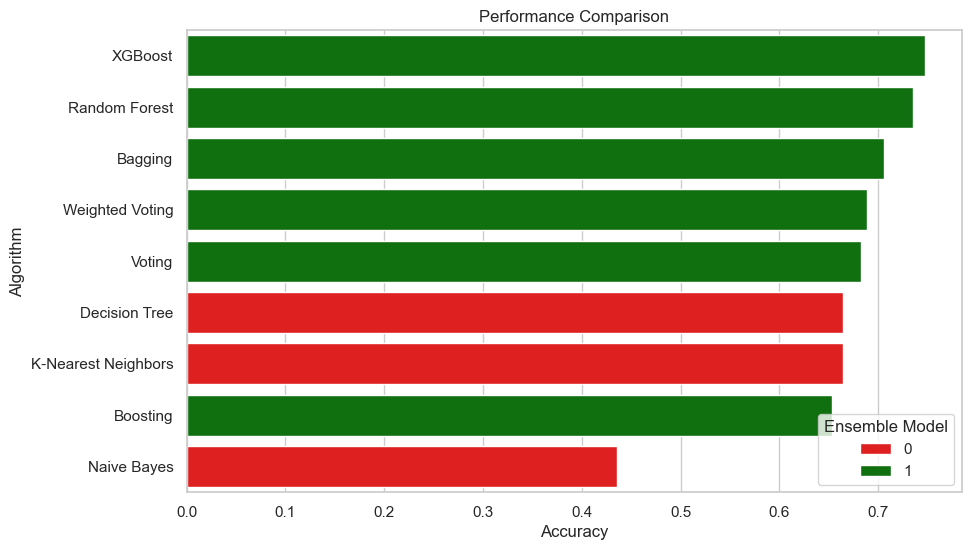

In [11]:
# Visualization
algo_names = ["Decision Tree", "Naive Bayes", "K-Nearest Neighbors", "Voting", "Weighted Voting", "Bagging", "Random Forest", "Boosting", "XGBoost"]
performances = [result_ca_DT, result_ca_NB, result_ca_KNN, result_voting, result_wvoting, result_bagging, result_rf, result_boosting, result_xgb]
ensemble_model = [0, 0, 0, 1, 1, 1, 1, 1, 1]

result_df = pd.DataFrame({'Algorithm': algo_names, 'Performance': performances, 'Ensemble Model': ensemble_model})
result_df = result_df.sort_values(by='Performance', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Performance', y='Algorithm', hue='Ensemble Model', data=result_df, dodge=False, palette={0: 'red', 1: 'green'})
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.title('Performance Comparison')
plt.legend(title='Ensemble Model', loc='lower right')
plt.show()